## K-최근접 이웃 알고리즘

### 핵심 아이디어

> 분류 항목을 이미 알고 있는 데이터 집합에서 상위 K개의 가장 유사한 데이터를 살펴보고, K개의 가장 유사한 데이터들 중 다수결(majority vote)를 통해 새로운 데이터의 분류 항목을 결정하게 된다.

### 의사코드

````
For every point in our dataset:
// 데이터 집합에 있는 모든 측정값 반복
    calculate the distance between inX and the current point
    // inX와 현재 측정값 사이의 거리 계산
    sort the distances in increasing order
    // 오름차순으로 거리 정렬
    take K items with lowest distances to inX
    // inX와의 거리가 가장 짧은 k개의 아이템 추출
    find the majority class among these items
    // K개의 아이템에서 가장 많은 분류 항목 찾기
    return the majority class as our prediction for the class of inX
    // inX의 분류 항목을 예측하기 위해 가장 많은 분류 항목을 반환함
````

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### matplotlib에서 한글이 되도록 세팅

In [22]:
# 한글이 되도록..
import matplotlib.font_manager as fm
# 2. 나눔 폰트의 위치 가져오기 
system_font = fm.findSystemFonts() # 현재 시스템에 설치된 폰트
nanum_fonts = [font for font in system_font if "NanumBarunGothic.ttf" in font]
font_path = nanum_fonts[0] # 설정할 폰트의 경로

# 3. 나눔 폰트로 설정하기
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc("font",family=font_name)

# 4. 폰트 재설정하기
fm._rebuild()

# 5. (optional) minus 기호 깨짐 방지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

## 데이터 셋 만들기

In [23]:
# 데이터 셋 만들기 (예시)
df = pd.DataFrame([
    [1.0,1.1,"A"],
    [1.0,1.0,"A"],
    [0.6,0.8,"A"],
    [0.9,0.7,"A"],
    [0.6,0.6,"A"],
    [0.6,0.9,"A"],
    [0.9,0.6,"A"],
    [0.3,0.8,"A"],
    [0. ,0. ,"B"],
    [0.1,0. ,'B'],
    [0.3,0.3,"B"],
    [0.5,0.2,"B"],    
    [0.2,0.5,"B"],
    [0.6,0.2,"B"],
    [0.4,0.3,"B"],
    [0.7,0.1,"B"],
    [0. ,1. ,"C"],
    [0.1,.9 ,"C"],
    [0.2,.9 ,"C"],
    [0.1,.8 ,"C"],
],    
    columns=["x","y","labels"]
)

group = df[['x',"y"]]
labels = df["labels"]

### 현재 데이터셋의 분포!

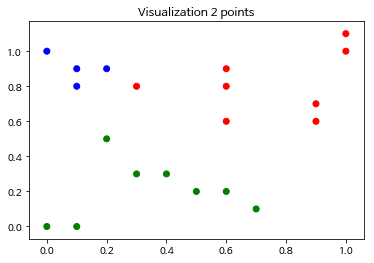

In [24]:
plt.title("Visualization 2 points")

colors = labels.map({"A":'r','B':'g',"C":'b'}) # A->붉은색, B->파란색
plt.scatter(group.loc[:,"x"],group.loc[:,"y"],c=colors)
plt.show()

In [25]:
def KNN(index, dataset, labels, K):
    # 거리 계산!
    dataset_size = len(dataset)
    diff_mat = dataset - index
    distances = np.sqrt((diff_mat**2).sum(axis=1)) # 거리 계산
    
    # 가장 짧은 K 거리를 투표
    sorted_distance_indices = distances.argsort() # 정렬 후 인덱스를 가져옴
    
    class_counts = pd.Series() # class 별 voting을 저장
    for i in range(K):
        # 라벨 가져오기
        vote_label = labels[sorted_distance_indices[i]]
        # 해당 라벨에 count 1추가
        class_counts[vote_label] = class_counts.get(vote_label, 0) + 1
    
    # Voting 수 만큼 정렬 후, 가장 많이 받은 수의 class 가져오기
    sorted_class_count = class_counts.idxmax()
    return sorted_class_count

### KNN을 통과하면 각 위치의 점은 어떤 식으로 변할까?

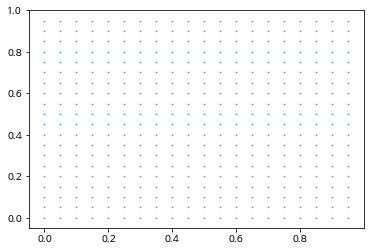

In [18]:
# 0부터 1사이까지 0.1 간격으로 데이터를 넣어보자
indexes = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))

plt.scatter(indexes[0],indexes[1],s=0.3)
plt.show()

> 위의 점들을 하나하나씩 KNN에 통과시키면서 결과를 살펴보자

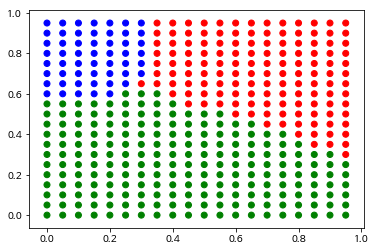

In [20]:
preds = []

points = list(zip(indexes[0].ravel(), indexes[1].ravel()))
for point in points:
    # Grid 내 각 점 별로 KNN에 넣음
    pred = KNN(point,group,labels,5)
    preds.append(pred)

# 결과를 시각적으로 표현하기 위해 색깔로 바꿈
colors = pd.Series(preds).map({"A":"r","B":'g',"C":'b'})

plt.scatter(indexes[0],indexes[1],c=colors)
plt.show()

## 데이터 분석하기

> 각 데이터 간 관련성은 아래와 같다

In [51]:
# 데이트 정보 가져오기
df = pd.read_csv("./datingTestSet.txt",sep="\t",
                 names=["연간항공마일리지수",
                        "비디오게임으로보내는시간",
                        "주당아이스크림소비량",
                        "라벨"])

matrix = df.iloc[:,:3].values
labels = df.iloc[:,3].values

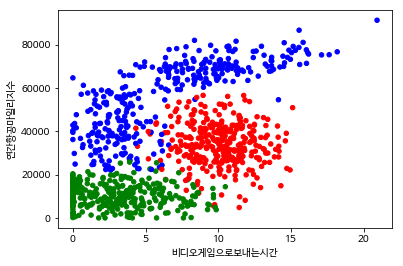

In [52]:
colors = df['라벨'].map({
    "largeDoses":"r",
    "smallDoses":"g",
    "didntLike":"b"
})

ax = df.plot("비디오게임으로보내는시간","연간항공마일리지수",
        kind='scatter',color=colors)

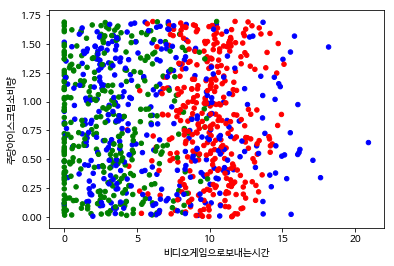

In [53]:
colors = df['라벨'].map({
    "largeDoses":"r",
    "smallDoses":"g",
    "didntLike":"b"
})

ax = df.plot("비디오게임으로보내는시간","주당아이스크림소비량",
        kind='scatter',color=colors)

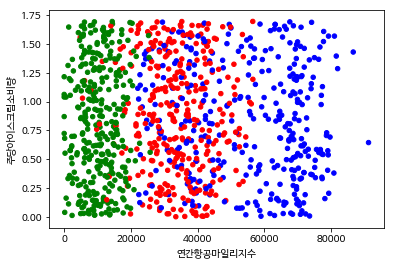

In [54]:
colors = df['라벨'].map({
    "largeDoses":"r",
    "smallDoses":"g",
    "didntLike":"b"
})

ax = df.plot("연간항공마일리지수","주당아이스크림소비량",
        kind='scatter',color=colors)

위에서 데이터를 보면, 변수간의 값의 범위가 너무 상이하다. 아까와 같이 단순히 값의 차이로, 거리를 내면, 연간항공마일리지수로 모든 것이 결졍된다. 이를 방지하기 위해 우리는 값을 `정규화`해야 한다.

## 0~1 정규화
모든 feature의 값을 0과 1 사이로 맵핑시키기 위해서는, 아래와 같은 수식을 적용하면 된다. 
이를 우리는 `Min-Max 정규화`라고 부른다.

$$
newValue = \frac{oldValue-min}{max-min}
$$

In [55]:
# 아래와 같이 코드를 치면 정규화가 된다.
df.iloc[:,:3] = (df.iloc[:,:3] - df.iloc[:,:3].min())/(df.iloc[:,:3].max() - df.iloc[:,:3].min())

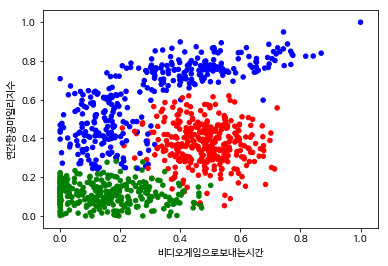

In [56]:
colors = df['라벨'].map({
    "largeDoses":"r",
    "smallDoses":"g",
    "didntLike":"b"
})

ax = df.plot("비디오게임으로보내는시간","연간항공마일리지수",
        kind='scatter',color=colors)

> 위와 같이 분포의 개형은 전혀 변화하지 않았지만, 각 값의 범위가 달라졌다.

## 위의 데이터로 KNN을 한번 돌려보자

In [62]:
test_df = df.sample(frac=0.1) # 테스트 데이터

train_df = df.drop(test_df.index) # 학습 데이터

In [73]:
# KNN에 들어가는 학습 데이터
dataset = train_df.iloc[:,:3].values
labels = train_df.iloc[:,3].values

In [97]:
# 결과 예측
predictions = []
for idx, row in test_df.iloc[:,:3].iterrows():
    prediction = KNN(row.values, dataset, labels, 3)
    predictions.append(prediction)

In [98]:
# 결과 표현
from sklearn.metrics import confusion_matrix # Confusion Matrix

result = confusion_matrix(y_pred=predictions,y_true=test_df['라벨'].values,
                      labels=['didntLike', 'smallDoses', 'largeDoses'])
result

array([[34,  1,  1],
       [ 0, 34,  0],
       [ 0,  2, 28]])

In [99]:
acc = (result[0,0]+result[1,1]+result[2,2])/result.sum()
print("정확도 : {}%".format(acc*100))

정확도 : 96.0%
